<a href="https://colab.research.google.com/github/nadiralam/Topic-Modelling/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 64.8 MB/s eta 0:00:00


In [ ]:
import pyLDAvis

import pyLDAvis.lda_model

%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/nlp by mithilesh sir/9 feb/quaries_list.csv')

df

,question_text
0,How did Quebec nationalists see their province...
1,"Do you have an adopted dog, how would you enco..."
2,Why does velocity affect time? Does velocity a...
3,How did Otto von Guericke used the Magdeburg h...
4,Can I convert montra helicon D to a mountain b...
...,...
983796,What info does a Facebook page receive when yo...
983797,"If no can know God, why believe in something y..."
983798,Is it true that the lunar cycle affects women'...
983799,What is the difference between the old currenc...


In [ ]:
df.shape

(983801, 1)

In [ ]:
df=df.sample(500)

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df_clean = pd.DataFrame(df.question_text.apply(lambda x: clean_text(x)))

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatizer(text):
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [ ]:
df_clean["question_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['question_text']), axis=1)

In [ ]:
df_clean

,question_text,question_lemmatize
853144,what are some of the best harry potter fanfict...,what be some of the good harry potter fanficti...
50720,what advice would you give to someone who is m...,what advice would you give to someone who be m...
282220,how did russia react in when nato started its...,how do russia react in when nato start its b...
671564,what are the working conditions of a graphic d...,what be the work condition of a graphic designer
689751,is there any way to define human rights,be there any way to define human right
...,...,...
969618,what would happen if a capacitor used a electr...,what would happen if a capacitor use a electre...
139389,am i eligible for neet if i failed in and app...,be I eligible for neet if I fail in and appe...
103621,why do people on quora ask questions that only...,why do people on quora ask question that only ...
819742,how do i stop feeling bad after a girl had a c...,how do I stop feel bad after a girl have a cru...


# **EDA**

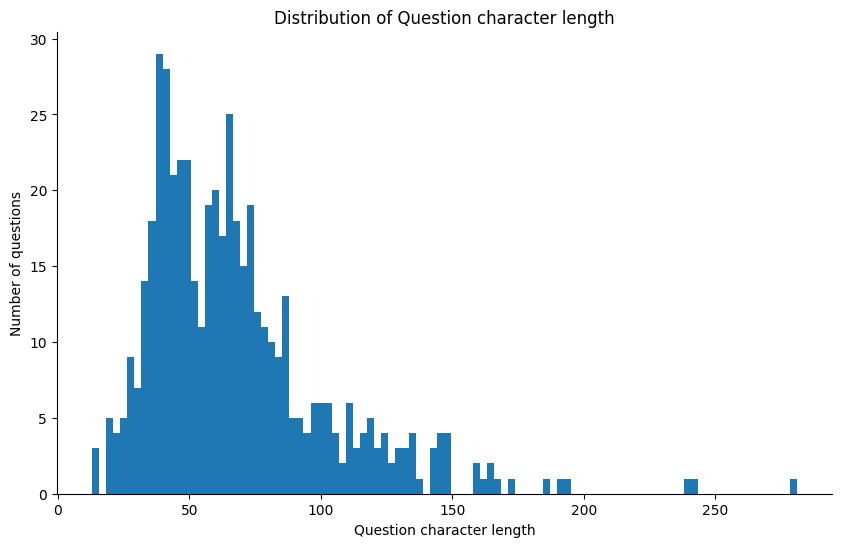

In [ ]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.question_text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Question character length')
plt.ylabel('Number of questions')
plt.xlabel('Question character length')
sns.despine();

In [ ]:
df_clean.to_csv('df_clean.csv', index=False)

In [ ]:
df_clean = pd.read_csv('df_clean.csv')

In [ ]:
df_clean.head()

,question_text,question_lemmatize
0,what are some of the best harry potter fanfict...,what be some of the good harry potter fanficti...
1,what advice would you give to someone who is m...,what advice would you give to someone who be m...
2,how did russia react in when nato started its...,how do russia react in when nato start its b...
3,what are the working conditions of a graphic d...,what be the work condition of a graphic designer
4,is there any way to define human rights,be there any way to define human right


In [ ]:
df_clean['question_lemmatize_clean'] = df_clean['question_lemmatize'].str.replace('-PRON-', '')

In [ ]:
df_clean

,question_text,question_lemmatize,question_lemmatize_clean
0,what are some of the best harry potter fanfict...,what be some of the good harry potter fanficti...,what be some of the good harry potter fanficti...
1,what advice would you give to someone who is m...,what advice would you give to someone who be m...,what advice would you give to someone who be m...
2,how did russia react in when nato started its...,how do russia react in when nato start its b...,how do russia react in when nato start its b...
3,what are the working conditions of a graphic d...,what be the work condition of a graphic designer,what be the work condition of a graphic designer
4,is there any way to define human rights,be there any way to define human right,be there any way to define human right
...,...,...,...
495,what would happen if a capacitor used a electr...,what would happen if a capacitor use a electre...,what would happen if a capacitor use a electre...
496,am i eligible for neet if i failed in and app...,be I eligible for neet if I fail in and appe...,be I eligible for neet if I fail in and appe...
497,why do people on quora ask questions that only...,why do people on quora ask question that only ...,why do people on quora ask question that only ...
498,how do i stop feeling bad after a girl had a c...,how do I stop feel bad after a girl have a cru...,how do I stop feel bad after a girl have a cru...


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['question_lemmatize_clean'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [ ]:
df2

,unigram,count
0,good,43
1,use,21
2,make,19
3,people,19
4,like,18
5,india,13
6,way,12
7,want,11
8,feel,11
9,start,10


In [ ]:
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_clean['question_lemmatize_clean'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

In [ ]:
df3

,bigram,count
0,make feel,3
1,harry potter,2
2,good course,2
3,credit card,2
4,need pay,2
5,feel like,2
6,computer science,2
7,good online,2
8,selection process,2
9,talk louder,2


In [ ]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_clean['question_lemmatize_clean'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [ ]:
df4

,trigram,count
0,fresher job big,2
1,job big datum,2
2,good harry potter,1
3,harry potter fanfiction,1
4,potter fanfiction right,1
5,advice cotia sao,1
6,cotia sao paulo,1
7,sao paulo brazil,1
8,russia react nato,1
9,react nato start,1


In [ ]:
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

In [ ]:
vectorizer = CountVectorizer(analyzer='word',
                             min_df=3,                        # minimum required occurences of a word
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(df_clean['question_lemmatize_clean'])

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [ ]:
data_vectorized

<500x187 sparse matrix of type '<class 'numpy.int64'>'
	with 968 stored elements in Compressed Sparse Row format>

In [ ]:
lda_output

array([[0.34999998, 0.01666667, 0.01666667, ..., 0.01666667, 0.01666667,
        0.01666667],
       [0.025     , 0.025     , 0.025     , ..., 0.025     , 0.025     ,
        0.025     ],
       [0.025     , 0.025     , 0.025     , ..., 0.025     , 0.025     ,
        0.025     ],
       ...,
       [0.00714286, 0.00714286, 0.00714286, ..., 0.00714286, 0.00714286,
        0.00714286],
       [0.0125    , 0.0125    , 0.0125    , ..., 0.0125    , 0.0125    ,
        0.0125    ],
       [0.00833333, 0.00833333, 0.00833333, ..., 0.00833333, 0.00833333,
        0.00833333]])

In [ ]:
pyLDAvis.enable_notebook()

prepared_data = pyLDAvis.lda_model.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
pyLDAvis.display(prepared_data) # Use display instead of show

In [ ]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,like,way,structure,right,feel,say,human,people,tell,blood,just,bird,add,health,lead,girl,app,face,mobile,force
Topic 1,benefit,cheap,security,person,medical,way,use,india,structure,good,laptop,help,job,engineer,example,country,choose,exam,issue,make
Topic 2,know,thing,love,people,write,post,really,indian,question,order,happy,public,possible,computer,language,hard,important,type,friend,life
Topic 3,car,problem,person,travel,month,game,cause,test,state,win,live,play,government,train,face,year,job,private,require,bad
Topic 4,talk,phone,eat,period,girl,mobile,world,new,low,thing,health,information,woman,affect,change,write,home,benefit,hard,good
Topic 5,new,choose,laptop,song,group,hard,public,experience,south,price,right,security,good,product,structure,social,benefit,use,different,bird
Topic 6,country,friend,like,example,food,affect,money,american,live,big,ask,startup,order,girl,issue,really,guy,work,state,process
Topic 7,allow,history,change,force,just,student,tell,radio,deal,important,write,form,south,india,book,study,new,song,government,know
Topic 8,people,child,university,science,field,data,process,selection,computer,cost,datum,want,park,security,indian,different,low,answer,ask,engineer
Topic 9,make,feel,bad,create,woman,percentage,web,date,business,youtube,girl,kid,want,public,sex,cost,happy,brain,far,american


In [ ]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,like,way,structure,right,feel,say,human,people,tell,blood,just,bird,add,health,lead,girl,app,face,mobile,force
Topic 1,benefit,cheap,security,person,medical,way,use,india,structure,good,laptop,help,job,engineer,example,country,choose,exam,issue,make
Topic 2,know,thing,love,people,write,post,really,indian,question,order,happy,public,possible,computer,language,hard,important,type,friend,life
Topic 3,car,problem,person,travel,month,game,cause,test,state,win,live,play,government,train,face,year,job,private,require,bad
Topic 4,talk,phone,eat,period,girl,mobile,world,new,low,thing,health,information,woman,affect,change,write,home,benefit,hard,good
Topic 5,new,choose,laptop,song,group,hard,public,experience,south,price,right,security,good,product,structure,social,benefit,use,different,bird
Topic 6,country,friend,like,example,food,affect,money,american,live,big,ask,startup,order,girl,issue,really,guy,work,state,process
Topic 7,allow,history,change,force,just,student,tell,radio,deal,important,write,form,south,india,book,study,new,song,government,know
Topic 8,people,child,university,science,field,data,process,selection,computer,cost,datum,want,park,security,indian,different,low,answer,ask,engineer
Topic 9,make,feel,bad,create,woman,percentage,web,date,business,youtube,girl,kid,want,public,sex,cost,happy,brain,far,american


In [ ]:
Topics_theme = ['American/Car/Marriage/Story/Life in general', 'Education/Business/Money', 'American Medicare/Trump', 'State/Social/Rights',
                'Build new life', 'Highly educated Indian engineers in America', 'Tips on improving work day efficiency', 'College/Service/Power',
                'Company/Human/Invest', 'Bank account/Charge', 'Book/Indian/App/Technology', 'War/Future/Family/USA/Race/Political',
                'Government/President/Society', 'Relationship/China/Parent/Japan', 'Application/Energy/Machine/Economic/Art/Europe', 'Earth/Marketing/Culture',
               'Air/Rate/Sleep/Blood/Email', 'Student/Internet/Computer/Science/Research', 'University/Engineering/Language/Software',
                'Job/Learn/Skill improvement']
df_topic_keywords['topic_theme'] = Topics_theme

In [ ]:
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,...,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19,topic_theme
Topic 0,like,way,structure,right,feel,say,human,people,tell,blood,...,bird,add,health,lead,girl,app,face,mobile,force,American/Car/Marriage/Story/Life in general
Topic 1,benefit,cheap,security,person,medical,way,use,india,structure,good,...,help,job,engineer,example,country,choose,exam,issue,make,Education/Business/Money
Topic 2,know,thing,love,people,write,post,really,indian,question,order,...,public,possible,computer,language,hard,important,type,friend,life,American Medicare/Trump
Topic 3,car,problem,person,travel,month,game,cause,test,state,win,...,play,government,train,face,year,job,private,require,bad,State/Social/Rights
Topic 4,talk,phone,eat,period,girl,mobile,world,new,low,thing,...,information,woman,affect,change,write,home,benefit,hard,good,Build new life
Topic 5,new,choose,laptop,song,group,hard,public,experience,south,price,...,security,good,product,structure,social,benefit,use,different,bird,Highly educated Indian engineers in America
Topic 6,country,friend,like,example,food,affect,money,american,live,big,...,startup,order,girl,issue,really,guy,work,state,process,Tips on improving work day efficiency
Topic 7,allow,history,change,force,just,student,tell,radio,deal,important,...,form,south,india,book,study,new,song,government,know,College/Service/Power
Topic 8,people,child,university,science,field,data,process,selection,computer,cost,...,want,park,security,indian,different,low,answer,ask,engineer,Company/Human/Invest
Topic 9,make,feel,bad,create,woman,percentage,web,date,business,youtube,...,kid,want,public,sex,cost,happy,brain,far,american,Bank account/Charge


In [ ]:
df_topic_keywords.set_index('topic_theme', inplace=True)

In [ ]:
df_topic_keywords.T

topic_theme,American/Car/Marriage/Story/Life in general,Education/Business/Money,American Medicare/Trump,State/Social/Rights,Build new life,Highly educated Indian engineers in America,Tips on improving work day efficiency,College/Service/Power,Company/Human/Invest,Bank account/Charge,Book/Indian/App/Technology,War/Future/Family/USA/Race/Political,Government/President/Society,Relationship/China/Parent/Japan,Application/Energy/Machine/Economic/Art/Europe,Earth/Marketing/Culture,Air/Rate/Sleep/Blood/Email,Student/Internet/Computer/Science/Research,University/Engineering/Language/Software,Job/Learn/Skill improvement
Word 0,like,benefit,know,car,talk,new,country,allow,people,make,good,iit,reach,time,quora,good,think,play,happen,use
Word 1,way,cheap,thing,problem,phone,choose,friend,history,child,feel,free,big,education,start,mean,india,book,value,company,work
Word 2,structure,security,love,person,eat,laptop,like,change,university,bad,life,form,right,year,word,course,trump,function,culture,exam
Word 3,right,person,people,travel,period,song,example,force,science,create,online,world,area,difference,question,job,good,second,need,different
Word 4,feel,medical,write,month,girl,group,food,just,field,woman,learn,require,important,deal,want,study,indian,degree,come,product
Word 5,say,way,post,game,mobile,hard,affect,student,data,percentage,limit,job,iit,plan,end,social,win,choose,college,program
Word 6,human,use,really,cause,world,public,money,tell,process,web,card,girl,country,change,popular,programming,world,course,engineering,hour
Word 7,people,india,indian,test,new,experience,american,radio,selection,date,world,guy,india,useful,term,business,like,learn,train,sex
Word 8,tell,structure,question,state,low,south,live,deal,computer,business,application,datum,health,advice,student,type,learn,good,pay,fast
Word 9,blood,good,order,win,thing,price,big,important,cost,youtube,help,white,word,experience,big,student,class,new,big,place


In [ ]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df_clean))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [ ]:
df_document_topic

topic_theme,American/Car/Marriage/Story/Life in general,Education/Business/Money,American Medicare/Trump,State/Social/Rights,Build new life,Highly educated Indian engineers in America,Tips on improving work day efficiency,College/Service/Power,Company/Human/Invest,Bank account/Charge,...,War/Future/Family/USA/Race/Political,Government/President/Society,Relationship/China/Parent/Japan,Application/Energy/Machine/Economic/Art/Europe,Earth/Marketing/Culture,Air/Rate/Sleep/Blood/Email,Student/Internet/Computer/Science/Research,University/Engineering/Language/Software,Job/Learn/Skill improvement,dominant_topic
Doc0,0.35,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.35,0.02,0.02,0.02,0.02,0
Doc1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.52,0.03,0.03,0.03,0.03,0.03,0.03,13
Doc2,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.52,0.03,0.03,0.03,0.03,0.03,0.03,13
Doc3,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.52,19
Doc4,0.76,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc495,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.35,0.35,18
Doc496,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.68,0.02,0.02,0.02,0.02,0.02,14
Doc497,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.58,0.01,...,0.01,0.01,0.01,0.29,0.01,0.01,0.01,0.01,0.01,8
Doc498,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.76,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,9


In [ ]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df_clean, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

In [ ]:
df_sent_topic

,question_text,question_lemmatize,question_lemmatize_clean,American/Car/Marriage/Story/Life in general,Education/Business/Money,American Medicare/Trump,State/Social/Rights,Build new life,Highly educated Indian engineers in America,Tips on improving work day efficiency,...,War/Future/Family/USA/Race/Political,Government/President/Society,Relationship/China/Parent/Japan,Application/Energy/Machine/Economic/Art/Europe,Earth/Marketing/Culture,Air/Rate/Sleep/Blood/Email,Student/Internet/Computer/Science/Research,University/Engineering/Language/Software,Job/Learn/Skill improvement,dominant_topic
0,what are some of the best harry potter fanfict...,what be some of the good harry potter fanficti...,what be some of the good harry potter fanficti...,0.35,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.35,0.02,0.02,0.02,0.02,0
1,what advice would you give to someone who is m...,what advice would you give to someone who be m...,what advice would you give to someone who be m...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.52,0.03,0.03,0.03,0.03,0.03,0.03,13
2,how did russia react in when nato started its...,how do russia react in when nato start its b...,how do russia react in when nato start its b...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.52,0.03,0.03,0.03,0.03,0.03,0.03,13
3,what are the working conditions of a graphic d...,what be the work condition of a graphic designer,what be the work condition of a graphic designer,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.52,19
4,is there any way to define human rights,be there any way to define human right,be there any way to define human right,0.76,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,what would happen if a capacitor used a electr...,what would happen if a capacitor use a electre...,what would happen if a capacitor use a electre...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.35,0.35,18
496,am i eligible for neet if i failed in and app...,be I eligible for neet if I fail in and appe...,be I eligible for neet if I fail in and appe...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.02,0.02,0.02,0.68,0.02,0.02,0.02,0.02,0.02,14
497,why do people on quora ask questions that only...,why do people on quora ask question that only ...,why do people on quora ask question that only ...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.29,0.01,0.01,0.01,0.01,0.01,8
498,how do i stop feeling bad after a girl had a c...,how do I stop feel bad after a girl have a cru...,how do I stop feel bad after a girl have a cru...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,9


In [ ]:
df_topic_theme = df_sent_topic[['question_text', 'dominant_topic']]

In [ ]:
df_topic_theme.head(10)

,question_text,dominant_topic
0,what are some of the best harry potter fanfict...,0
1,what advice would you give to someone who is m...,13
2,how did russia react in when nato started its...,13
3,what are the working conditions of a graphic d...,19
4,is there any way to define human rights,0
5,has the decolonization of africa led to a more...,19
6,love is the most important thing in life but p...,2
7,can you add memory to your notebook from to ...,0
8,what is the main use of the circuit breaker pr...,19
9,is iit or ca is tougher,11


In [ ]:
def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'American/Car/Marriage/Story/Life in general'
    if row['dominant_topic'] == 1 :
        return 'Education/Business/Money'
    if row['dominant_topic'] == 2 :
        return 'American Medicare/Trump'
    if row['dominant_topic'] == 3:
        return 'State/Social/Rights'
    if row['dominant_topic']  == 4:
        return 'Build new life'
    if row['dominant_topic'] == 5:
        return 'Highly educated Indian engineers in America'
    if row['dominant_topic'] == 6:
        return 'Tips on improving work day efficiency'
    if row['dominant_topic'] == 7:
        return 'College/Service/Power'
    if row['dominant_topic'] == 8:
        return 'Company/Human/Invest'
    if row['dominant_topic'] == 9:
        return 'Bank account/Charge'
    if row['dominant_topic'] == 10:
        return 'Book/Indian/App/Technology'
    if row['dominant_topic'] == 11:
        return 'War/Future/Family/USA/Race/Political'
    if row['dominant_topic'] == 12:
        return 'Government/President/Society'
    if row['dominant_topic'] == 13:
        return 'Relationship/China/Parent/Japan'
    if row['dominant_topic'] == 14:
        return 'Application/Energy/Machine/Economic/Art/Europe'
    if row['dominant_topic'] == 15:
        return 'Earth/Marketing/Culture'
    if row['dominant_topic'] == 16:
        return 'Air/Rate/Sleep/Blood/Email'
    if row['dominant_topic'] == 17:
        return 'Student/Internet/Computer/Science/Research'
    if row['dominant_topic'] == 18:
        return 'University/Engineering/Language/Software'
    if row['dominant_topic'] == 19:
        return 'Job/Learn/Skill improvement'

In [ ]:
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)

<ipython-input-44-0fe12e0302d6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_topic_theme.head(15)

,question_text,dominant_topic,dominant_topic_theme
0,what are some of the best harry potter fanfict...,0,American/Car/Marriage/Story/Life in general
1,what advice would you give to someone who is m...,13,Relationship/China/Parent/Japan
2,how did russia react in when nato started its...,13,Relationship/China/Parent/Japan
3,what are the working conditions of a graphic d...,19,Job/Learn/Skill improvement
4,is there any way to define human rights,0,American/Car/Marriage/Story/Life in general
5,has the decolonization of africa led to a more...,19,Job/Learn/Skill improvement
6,love is the most important thing in life but p...,2,American Medicare/Trump
7,can you add memory to your notebook from to ...,0,American/Car/Marriage/Story/Life in general
8,what is the main use of the circuit breaker pr...,19,Job/Learn/Skill improvement
9,is iit or ca is tougher,11,War/Future/Family/USA/Race/Political


In [ ]:
df_topic_keywords.T['University/Engineering/Language/Software']

,University/Engineering/Language/Software
Word 0,happen
Word 1,company
Word 2,culture
Word 3,need
Word 4,come
Word 5,college
Word 6,engineering
Word 7,train
Word 8,pay
Word 9,big


In [ ]:
df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

,dominant_topic,dominant_topic_theme,count
0,0,American/Car/Marriage/Story/Life in general,115
1,15,Earth/Marketing/Culture,46
2,9,Bank account/Charge,29
3,19,Job/Learn/Skill improvement,28
4,8,Company/Human/Invest,26
5,13,Relationship/China/Parent/Japan,25
6,18,University/Engineering/Language/Software,25
7,3,State/Social/Rights,24
8,11,War/Future/Family/USA/Race/Political,23
9,2,American Medicare/Trump,23


In [ ]:
df_topic_distribution = df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

In [ ]:
df_topic_distribution

,dominant_topic,dominant_topic_theme,count
0,0,American/Car/Marriage/Story/Life in general,115
1,15,Earth/Marketing/Culture,46
2,9,Bank account/Charge,29
3,19,Job/Learn/Skill improvement,28
4,8,Company/Human/Invest,26
5,13,Relationship/China/Parent/Japan,25
6,18,University/Engineering/Language/Software,25
7,3,State/Social/Rights,24
8,11,War/Future/Family/USA/Race/Political,23
9,2,American Medicare/Trump,23


In [ ]:
# Tokenize and Clean-up using gensim’s simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [ ]:
df_topic_keywords.T['Student/Internet/Computer/Science/Research']

,Student/Internet/Computer/Science/Research
Word 0,play
Word 1,value
Word 2,function
Word 3,second
Word 4,degree
Word 5,choose
Word 6,course
Word 7,learn
Word 8,good
Word 9,new


In [ ]:
df_topic_keywords.T['Job/Learn/Skill improvement']

,Job/Learn/Skill improvement
Word 0,use
Word 1,work
Word 2,exam
Word 3,different
Word 4,product
Word 5,program
Word 6,hour
Word 7,sex
Word 8,fast
Word 9,place


In [ ]:
df_topic_theme.head()

,question_text,dominant_topic,dominant_topic_theme
0,what are some of the best harry potter fanfict...,0,American/Car/Marriage/Story/Life in general
1,what advice would you give to someone who is m...,13,Relationship/China/Parent/Japan
2,how did russia react in when nato started its...,13,Relationship/China/Parent/Japan
3,what are the working conditions of a graphic d...,19,Job/Learn/Skill improvement
4,is there any way to define human rights,0,American/Car/Marriage/Story/Life in general
